# Market Basket Aanalysis

In [1]:
import numpy as np
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import matplotlib.pyplot as plt


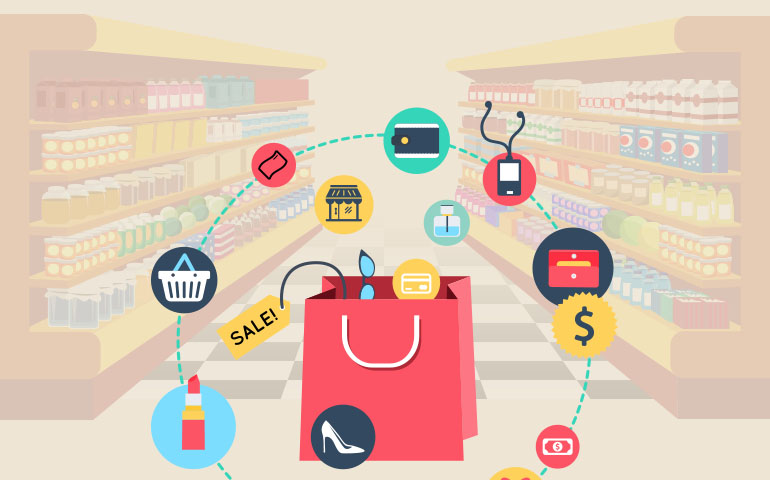

In [26]:
from IPython.display import Image
Image(filename='market-basket-analysis.jpg')

In [4]:
groceries = pd.read_csv('groceries.csv',header = None)

In [7]:
groceries.drop(0,axis=1,inplace=True)

In [10]:
uniq = list(np.unique(groceries[list(groceries.columns)].values))

In [11]:
# one hot encoding

Data = {}

for i in uniq:
    L = list()
    for j in groceries.values.tolist():
        if i in j:
            L.append(1)
        else:
            L.append(0)
    Data[i] = L

In [12]:
df1 = pd.DataFrame.from_dict(Data)
df1.drop('null',axis=1,inplace=True)

In [13]:
df1.head()

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [14]:
# Frequent itemsets
frequent_itemsets = apriori(df1, min_support=0.01, use_colnames=True,max_len = 3)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))

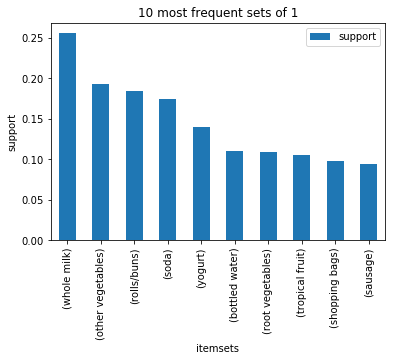

In [15]:
# Visualisations
top10_single = frequent_itemsets.sort_values('support',ascending=False).head(10)
ax = top10_single.plot(kind = 'bar',y='support',x = 'itemsets',title = '10 most frequent sets of 1')
ax.set_ylabel("support")
plt.show()

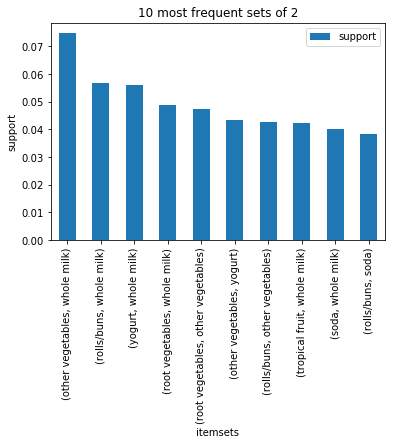

In [16]:
top10_double = frequent_itemsets[frequent_itemsets.length==2].sort_values('support',ascending=False).head(10)
ax2 = top10_double.plot(kind = 'bar',y='support',x = 'itemsets',title = '10 most frequent sets of 2')
ax2.set_ylabel("support")
plt.show()

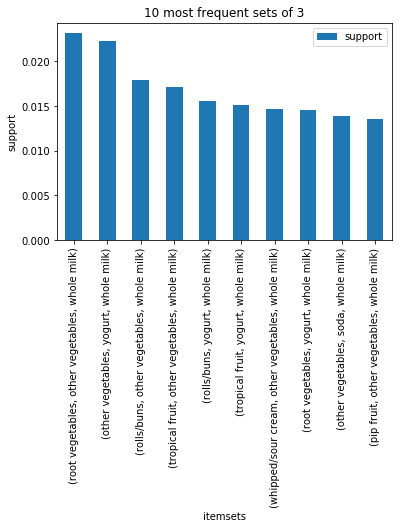

In [17]:
top10_triple = frequent_itemsets[frequent_itemsets.length==3].sort_values('support',ascending=False).head(10)
ax3 = top10_triple.plot(kind = 'bar',y='support',x = 'itemsets',title = '10 most frequent sets of 3')
ax3.set_ylabel("support")
plt.show()

In [20]:
# Rules

rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
top20_lift = rules.sort_values('lift',ascending=False).head(20)
top20_lift

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
439,(curd),"(yogurt, whole milk)",0.053274,0.056019,0.010065,0.188931,3.372647,0.007081,1.163873
438,"(yogurt, whole milk)",(curd),0.056019,0.053274,0.010065,0.179673,3.372647,0.007081,1.154085
419,"(citrus fruit, other vegetables)",(root vegetables),0.028874,0.108987,0.010370,0.359155,3.295380,0.007223,1.390371
422,(root vegetables),"(citrus fruit, other vegetables)",0.108987,0.028874,0.010370,0.095149,3.295380,0.007223,1.073245
539,"(other vegetables, yogurt)",(whipped/sour cream),0.043412,0.071675,0.010167,0.234192,3.267394,0.007055,1.212216
542,(whipped/sour cream),"(other vegetables, yogurt)",0.071675,0.043412,0.010167,0.141844,3.267394,0.007055,1.114702
492,"(tropical fruit, other vegetables)",(root vegetables),0.035889,0.108987,0.012302,0.342776,3.145100,0.008390,1.355722
493,(root vegetables),"(tropical fruit, other vegetables)",0.108987,0.035889,0.012302,0.112873,3.145100,0.008390,1.086780
4,(root vegetables),(beef),0.108987,0.052460,0.017385,0.159515,3.040676,0.011668,1.127372
5,(beef),(root vegetables),0.052460,0.108987,0.017385,0.331395,3.040676,0.011668,1.332645


In [21]:
rules_conf = association_rules(frequent_itemsets, metric="confidence",min_threshold=0.05)
rules_conf.sort_values('confidence',ascending=False).head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
427,"(citrus fruit, root vegetables)",(other vegetables),0.017690,0.193473,0.010370,0.586207,3.029916,0.006948,1.949107
493,"(root vegetables, tropical fruit)",(other vegetables),0.021045,0.193473,0.012302,0.584541,3.021306,0.008230,1.941292
444,"(curd, yogurt)",(whole milk),0.017283,0.255490,0.010065,0.582353,2.279357,0.005649,1.782629
422,"(butter, other vegetables)",(whole milk),0.020028,0.255490,0.011488,0.573604,2.245113,0.006371,1.746053
568,"(root vegetables, tropical fruit)",(whole milk),0.021045,0.255490,0.011997,0.570048,2.231196,0.006620,1.731613
573,"(root vegetables, yogurt)",(whole milk),0.025824,0.255490,0.014538,0.562992,2.203578,0.007941,1.703653
449,"(domestic eggs, other vegetables)",(whole milk),0.022265,0.255490,0.012302,0.552511,2.162556,0.006613,1.663752
590,"(whipped/sour cream, yogurt)",(whole milk),0.020740,0.255490,0.010878,0.524510,2.052956,0.005580,1.565774
552,"(rolls/buns, root vegetables)",(whole milk),0.024298,0.255490,0.012708,0.523013,2.047096,0.006500,1.560859
464,"(other vegetables, pip fruit)",(whole milk),0.026129,0.255490,0.013522,0.517510,2.025557,0.006846,1.543057
